You can use this template for problems 1, 2 and 3

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
# Students will submit their files with their team-name.py
# Student have to use the Team as their parent class

Recent Version of the Code

In [ ]:
class Agent:
  def __init__(self):
    self.weights = np.zeros(6)
    self.s = np.ones(6)
    self.t = 1

  def get_action(self,runs_scored,Q_no=1):
    action = self.kl_ucb()
    self.t+=1
    # print(action, self.weights)
    return action

  def get_KL(self,w,q):
    if w==0:
      KL = np.log(1/(1-q))
    else:
      KL = w*np.log(w/q) + (1-w)*np.log((1-w)/(1-q))
    return KL

  def get_kl_ucb(self):
    # return self.weights + np.sqrt(1.5*np.log(self.t)/self.s)
    UCB = []
    for i in range(6):
      w = self.weights[i]
      C = (np.log(self.t) + 3*np.log(np.log(self.t)))/self.s[i]
      q = minimize_scalar(lambda q: (self.get_KL(w,q) - C)**2,bounds=(w,1)).x
      UCB.append(min(q,1))
    return UCB

  def get_kl_lcb(self):
    # return self.weights - np.sqrt(1.5*np.log(self.t)/self.s)
    UCB = []
    for i in range(6):
      w = self.weights[i]
      C = (np.log(self.t) + 3*np.log(np.log(self.t)))/self.s[i]
      q = minimize_scalar(lambda q: (self.get_KL(w,q) - C)**2,bounds=(0,w)).x
      UCB.append(max(q,0))
    return UCB

  def kl_ucb(self):
    if self.t<7:
      return self.t-1
    # return np.random.randint(0,6)
    KL_UCB = self.get_kl_ucb()
    a_t = np.argmax(KL_UCB)
    return a_t

  def kl_lcb(self):
    if self.t<7:
      return self.t-1
    # return np.random.randint(0,6)
    KL_UCB = self.get_kl_lcb()
    a_t = np.argmin(KL_UCB)
    return a_t

  def update_weights_kl(self,a_t,wicket,run):
    self.weights[a_t] = (self.s[a_t]*self.weights[a_t] + (1-wicket))/(self.s[a_t]+1)
    self.s[a_t]+=1

In [ ]:
class Agent2:
  def __init__(self):
    self.weights = np.zeros(6)
    self.actions = [0,1,2,3,4,6]
    self.s = np.ones(6)
    self.t = 1

  def get_action(self,runs_scored, wicket):
    action = self.kl_ucb()
    self.t+=1
    self.update_weights_kl(action,wicket, runs_scored)
    # print(action, self.weights)
    return action

  def get_KL(self,w,q):
    if w==0:
      KL = np.log(1/(1-q))
    else:
      KL = w*np.log(w/q) + (1-w)*np.log((1-w)/(1-q))
    return KL

  def get_kl_ucb(self):
    return self.weights + np.sqrt(1.5*np.log(self.t)/self.s)
    UCB = []
    for i in range(6):
      w = self.weights[i]
      C = (np.log(self.t) + 3*np.log(np.log(self.t)))/self.s[i]
      q = minimize_scalar(lambda q: (self.get_KL(w,q) - C)**2,bounds=(w,1)).x
      UCB.append(min(q,1))
    return UCB

  def get_kl_lcb(self):
    # return self.weights - np.sqrt(1.5*np.log(self.t)/self.s)
    UCB = []
    for i in range(6):
      w = self.weights[i]
      C = (np.log(self.t) + 3*np.log(np.log(self.t)))/self.s[i]
      q = minimize_scalar(lambda q: (self.get_KL(w,q) - C)**2,bounds=(0,w)).x
      UCB.append(max(q,0))
    return UCB

  def kl_ucb(self):
    if self.t<7:
      return self.t-1
    # return np.random.randint(0,6)
    KL_UCB = self.get_kl_ucb()
    a_t = np.argmax(KL_UCB)
    return a_t

  def kl_lcb(self):
    if self.t<7:
      return self.t-1
    # return np.random.randint(0,6)
    KL_UCB = self.get_kl_lcb()
    a_t = np.argmin(KL_UCB)
    return a_t

  def update_weights_kl(self,a_t,wicket,run):
    # self.pout_cap[a_t] = (self.s[a_t]*self.pout_cap[a_t] + wicket)/(self.s[a_t]+1)
    self.weights[a_t] = (self.s[a_t]*self.weights[a_t] + run)/(self.s[a_t]+1)
    # if wicket==0 and run!=0:
    #   self.weights[a_t] = (self.s[a_t]*self.weights[a_t] + 1)/(self.s[a_t]+1)
    # elif wicket==0:
    #   self.weights[a_t] = (self.s[a_t]*self.weights[a_t])/(self.s[a_t]+1)

    self.s[a_t]+=1

In [ ]:
class Environment:
  def __init__(self,num_balls,agent):
    self.num_balls = num_balls
    self.agent = agent
    self.__run_time = 0
    self.__total_runs = 0
    self.__total_wickets = 0
    self.__runs_scored = 0
    self.__start_time = 0
    self.__end_time = 0
    self.__regret_w = 0
    self.__regret_s = 0
    self.__regret_rho = 0
    self.__p_out =np.array([0.001,0.01,0.02,0.03,0.1,0.3])
    self.__p_run =np.array([1,0.9,0.85,0.8,0.75,0.7])
    self.__action_runs_map = np.array([0,1,2,3,4,6])
    self.__s = (1-self.__p_out)*self.__p_run*self.__action_runs_map
    self.__rho = self.__s/self.__p_out


  def __get_action(self):
    self.__start_time = time.time()
    action  = self.agent.get_action(self.__runs_scored, self.__wicket)
    self.__end_time  = time. time()
    self.__run_time = self.__run_time + self.__end_time - self.__start_time
    return action


  def __get_outcome(self, action):
    pout = self.__p_out[action]
    prun= self.__p_run[action]
    wicket = np.random.choice(2,1,p=[1-pout,pout])[0]
    runs = 0
    if(wicket==0):
      runs = self.__action_runs_map[action]*np.random.choice(2,1,p=[1-prun,prun])[0]
    # self.agent.update_weights_kl(action, wicket,runs)
    return wicket, runs


  def innings(self):
    self.__total_runs = 0
    self.__total_wickets = 0
    self.__runs_scored = 0

    for ball in range(self.num_balls):
      action = self.__get_action()
      self.__wicket, self.__runs_scored   = self.__get_outcome(action)
      self.__total_runs     = self.__total_runs + self.__runs_scored
      self.__total_wickets  = self.__total_wickets + self.__wicket
      self.__regret_w       = self.__regret_w+ (self.__p_out[action]-np.min(self.__p_out))
      regret_w1.append(self.__regret_w)
      self.__regret_s       = self.__regret_s - ((1-self.__p_out[action])*self.__p_run[action]*self.__action_runs_map[action]-np.max(self.__s))
      regret_s1.append(self.__regret_s)
      self.__regret_rho       = self.__regret_rho- ((1-self.__p_out[action])*self.__p_run[action]*self.__action_runs_map[action]/self.__p_out[action]-np.max(self.__rho))
    return self.__regret_w,self.__regret_s,self.__regret_rho, self.__total_runs, self.__total_wickets, self.__run_time


## Q1

In [ ]:
regret_w1 = []
agent = Agent()
environment = Environment(1000,agent)
regret_w,regret_s,reger_rho,total_runs,total_wickets,run_time = environment.innings()

In [ ]:
print(regret_w,regret_s,reger_rho,total_runs,total_wickets,run_time)

5.082000000000007 2625.75600000003 74144.99999999974 319 5 3.998623847961426


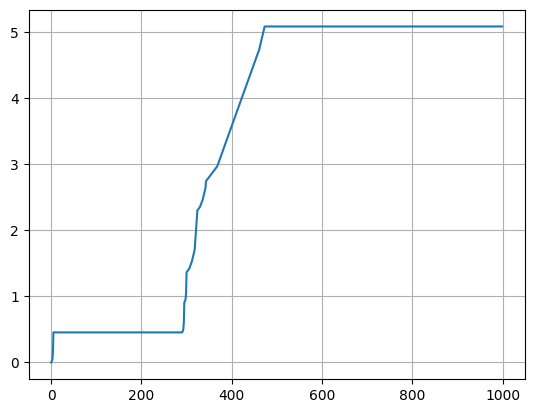

In [ ]:
import matplotlib.pyplot as plt
plt.plot(regret_w1)
plt.grid()
plt.show()

In [ ]:
print(1-agent.weights, agent.s)

[0.00123001 0.04878049 0.01834862 0.07142857 0.18181818 0.5       ] [813.  41. 109.  28.  11.   4.]


## Q2

In [ ]:
regret_s1 = []
agent = Agent2()
environment = Environment(10000,agent)
regret_w,regret_s,reger_rho,total_runs,total_wickets,run_time = environment.innings()

In [ ]:
print(regret_w,regret_s,reger_rho,total_runs,total_wickets,run_time)

2976.870999999806 36.72199999999995 789861.4000001017 28995 3009 0.12860107421875


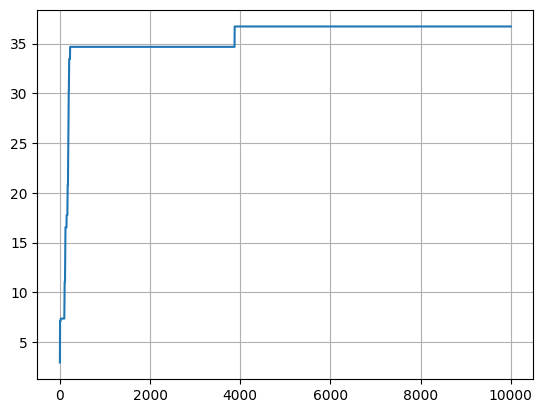

In [ ]:
import matplotlib.pyplot as plt
plt.plot(regret_s1)
plt.grid()
plt.show()

In [ ]:
print(agent.weights, agent.s)

[0.         0.66666667 1.2        2.325      1.         2.90293408] [2.000e+00 3.000e+00 5.000e+00 4.000e+01 4.000e+00 9.952e+03]
